In [10]:
conda install shapely

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
%matplotlib inline
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import LineString

P1ss = 3529.666458243191
P2ss = 0.08625285376923068


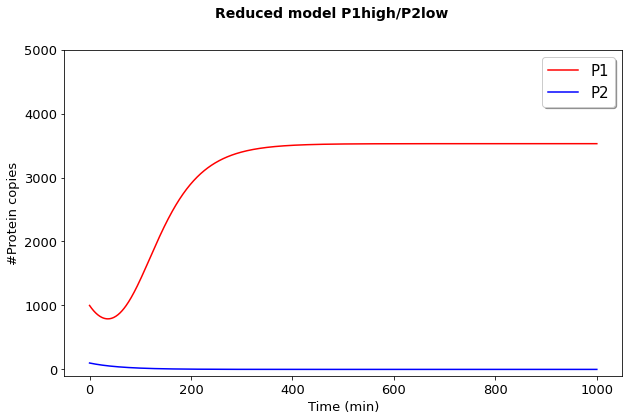

In [12]:
#Reduced model simulation highP1/lowP2

def sdot_toggle(s,t,params):
    # define parametres and variables
    P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2 = params
    
    # define ODE rate equations
    rate_P1_production = kp1 * ((K2**n2)/(P2**n2 + K2**n2))
    rate_P2_production = kp2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dP1, dP2]
    return dsdt

#params
kp1= 58.24
kp2= 17.38
#kp1= 0.9726
#kp2= 1.170
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
params = [kp1, kp2, kdp1, kdp2, K1, K2, n1, n2]

# define list of observation points 't_obs'
t_start = 0
t_end = 1000
n_obs = 1000
t_obs = np.linspace(t_start, t_end, n_obs)

# Define initial conditions
# Use the odeint function to simulate system
# unpack s_obs into variable observations
P1 = 1000
P2 = 100

s0 = [P1,P2]

s_obs = odeint(sdot_toggle, s0, t_obs, args=(params,))

P1_obs = s_obs[:,0]
P2_obs = s_obs[:,1]

print(f'P1ss = {P1_obs[-1]}')
print(f'P2ss = {P2_obs[-1]}')

# Plot results
fig = plt.figure(figsize=(10,6))
fig.suptitle('Reduced model P1high/P2low ', 
              fontsize=14, fontweight='bold')
axes1 = fig.add_subplot(1,1,1)

axes1.plot(t_obs, P1_obs, 'r-', label='P1')
axes1.plot(t_obs, P2_obs, 'b-', label='P2')

axes1.set_ylabel('#Protein copies')
axes1.set_xlabel('Time (min)')

axes1.xaxis.label.set_size(13)
axes1.yaxis.label.set_size(13)
axes1.xaxis.set_tick_params(labelsize=13)
axes1.yaxis.set_tick_params(labelsize=13)

axes1.set_ylim(-100,5000)
axes1.legend(loc = 'upper right', prop={'size': 15}, shadow=True)

plt.savefig('reduced_highP1.png');

P1ss = 2.9086629080040525
P2ss = 1044.664307876301


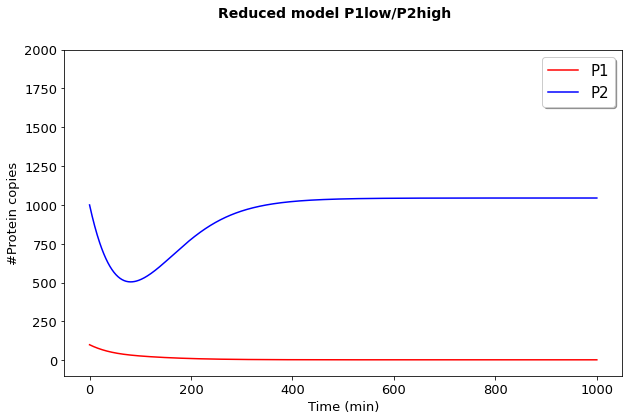

In [13]:
#Reduced model simulation highP2/lowP1

def sdot_toggle(s,t,params):
    # define parametres and variables
    P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2 = params
    
    # define ODE rate equations
    rate_P1_production = kp1 * ((K2**n2)/(P2**n2 + K2**n2))
    rate_P2_production = kp2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dP1, dP2]
    return dsdt

#params
kp1= 58.24
kp2= 17.38
#kp1= 0.9726
#kp2= 1.170
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
params = [kp1, kp2, kdp1, kdp2, K1, K2, n1, n2]

# define list of observation points 't_obs'
t_start = 0
t_end = 1000
n_obs = 1000
t_obs = np.linspace(t_start, t_end, n_obs)

# Define initial conditions
# Use the odeint function to simulate system
# unpack s_obs into variable observations
P1 = 100
P2 = 1000

s0 = [P1,P2]

s_obs = odeint(sdot_toggle, s0, t_obs, args=(params,))

P1_obs0 = s_obs[:,0]
P2_obs0 = s_obs[:,1]

print(f'P1ss = {P1_obs0[-1]}')
print(f'P2ss = {P2_obs0[-1]}')

# Plot results
fig = plt.figure(figsize=(10,6))
fig.suptitle('Reduced model P1low/P2high', 
              fontsize=14, fontweight='bold')
axes1 = fig.add_subplot(1,1,1)

axes1.plot(t_obs, P1_obs0, 'r-', label='P1')
axes1.plot(t_obs, P2_obs0, 'b-', label='P2')

axes1.set_ylabel('#Protein copies')
axes1.set_xlabel('Time (min)')

axes1.xaxis.label.set_size(13)
axes1.yaxis.label.set_size(13)
axes1.xaxis.set_tick_params(labelsize=13)
axes1.yaxis.set_tick_params(labelsize=13)

axes1.set_ylim(-100,2000)
axes1.legend(loc = 'upper right', prop={'size': 15}, shadow=True)

plt.savefig('reduced_2.png');

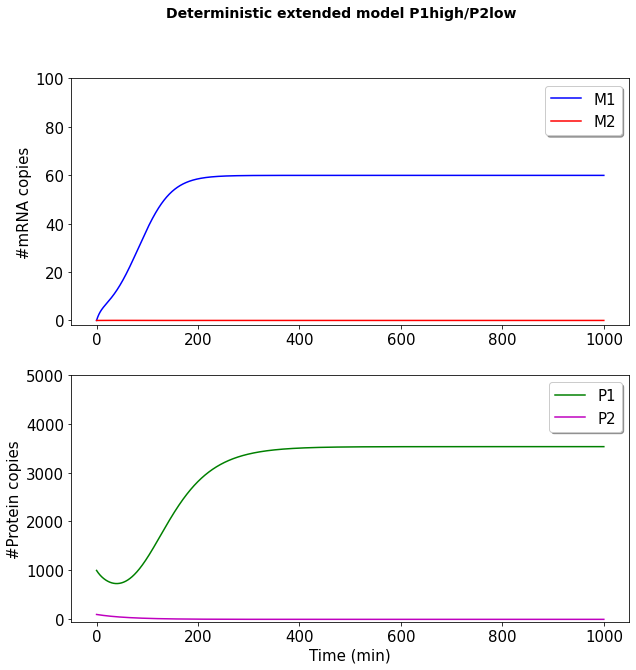

In [14]:
# Figure8A: MODEL FOR DETERMINISTIC GENE EXPRESSION highP1/lowP2

def sdot_toggle_deterministic(s,t,params):
    # parametres and variables
    M1,M2,P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2 = params
    
    # define rate ODEs
    rate_M1_production = km1 * ((K2**n2)/(P2**n2 + K2**n2)) 
    rate_M2_production = km2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_production = kp1 * M1
    rate_P2_production = kp2 * M2
    rate_M1_loss = -kdm1*M1
    rate_M2_loss = -kdm2*M2
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dM1 = rate_M1_production + rate_M1_loss
    dM2 = rate_M2_production + rate_M2_loss
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dM1, dM2, dP1, dP2]
    return dsdt

# DEFINE INITIAL CONDITIONS AND PARAMETERS

M1=0.0
M2=0.0
P1=1000
P2=100

kp1= 0.9726
kp2= 1.170
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
km1= 8.3
km2= 2.06
kdm1 = 0.1386
kdm2 = 0.1386

s0=(M1,M2,P1,P2)
params = (kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2)

# time points
t_max=1000
t_obs=np.linspace(0,t_max,10000)

# Use the odeint function to simulate system
s_obs=odeint(sdot_toggle_deterministic,s0,t_obs,args=(params,))

# print steady state values for mRNA and proteins
M1_obs1=s_obs[:,0]
M2_obs1=s_obs[:,1]
P1_obs1=s_obs[:,2]
P2_obs1=s_obs[:,3]

#print(M1_obs1[-1])
#print(M2_obs1[-1])
#print(P1_obs1[-1])
#print(P2_obs1[-1])

# plot results
fig = plt.figure(figsize=(10,10))
fig.suptitle('Deterministic extended model P1high/P2low', 
              fontsize=14, fontweight='bold')

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(t_obs, M1_obs1, 'b-',label='M1')
ax1.plot(t_obs, M2_obs1, 'r-',label='M2')
ax2.plot(t_obs, P1_obs1, 'g-',label='P1')
ax2.plot(t_obs, P2_obs1, 'm-',label='P2')

ax1.set_ylim(-2,100)
ax2.set_ylim(-50,5000)

ax1.set_ylabel("#mRNA copies")
ax2.set_ylabel("#Protein copies")
ax2.set_xlabel("Time (min)")

ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
ax2.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)

ax1.legend(loc = 'upper right', prop={'size': 15}, shadow=True)
ax2.legend(loc = 'upper right', prop={'size': 15}, shadow=True)

plt.savefig('fig8A.png');

P1ss = 0.04928957767150933
P2ss = 14.740916273235532
P1ss = 2.9056606485732352
P2ss = 1045.2563307894814


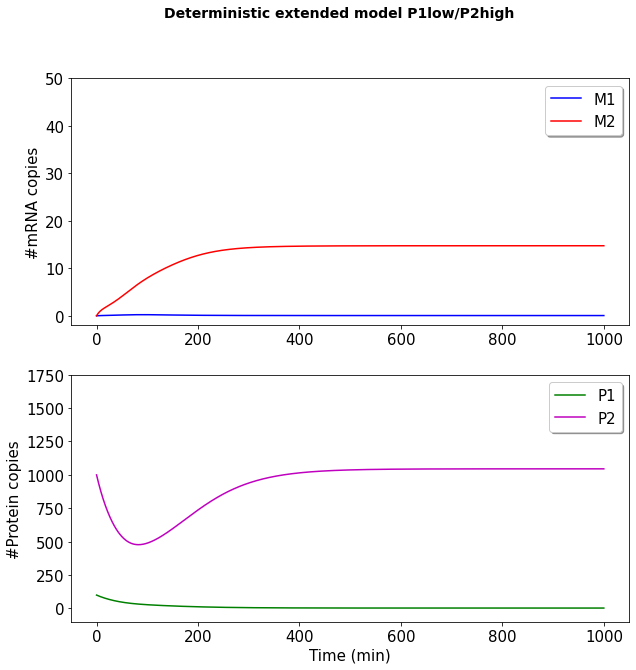

In [15]:
# Figure 8B: MODEL FOR DETERMINISTIC GENE EXPRESSION lowP1/highP2

def sdot_toggle_deterministic(s,t,params):
    # parametres and variables
    M1,M2,P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2 = params
    
    # define rate ODEs
    rate_M1_production = km1 * ((K2**n2)/(P2**n2 + K2**n2)) 
    rate_M2_production = km2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_production = kp1 * M1
    rate_P2_production = kp2 * M2
    rate_M1_loss = -kdm1*M1
    rate_M2_loss = -kdm2*M2
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dM1 = rate_M1_production + rate_M1_loss
    dM2 = rate_M2_production + rate_M2_loss
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dM1, dM2, dP1, dP2]
    return dsdt

# DEFINE INITIAL CONDITIONS AND PARAMETERS

M1=0.0
M2=0.0
P1=100
P2=1000

kp1= 0.9726
kp2= 1.170
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
km1= 8.3
km2= 2.06
kdm1 = 0.1386
kdm2 = 0.1386

s0=(M1,M2,P1,P2)
params = (kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2)

# time points
t_max=1000
t_obs=np.linspace(0,t_max,10000)

# Use the odeint function to simulate system
s_obs=odeint(sdot_toggle_deterministic,s0,t_obs,args=(params,))

# print steady state values for mRNA and proteins
M1_obs2=s_obs[:,0]
M2_obs2=s_obs[:,1]
P1_obs2=s_obs[:,2]
P2_obs2=s_obs[:,3]

print(f'P1ss = {M1_obs2[-1]}')
print(f'P2ss = {M2_obs2[-1]}')
print(f'P1ss = {P1_obs2[-1]}')
print(f'P2ss = {P2_obs2[-1]}')

# plot results
fig = plt.figure(figsize=(10,10))
fig.suptitle('Deterministic extended model P1low/P2high ', 
              fontsize=14, fontweight='bold')

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(t_obs, M1_obs2, 'b-',label='M1')
ax1.plot(t_obs, M2_obs2, 'r-',label='M2')
ax2.plot(t_obs, P1_obs2, 'g-',label='P1')
ax2.plot(t_obs, P2_obs2, 'm-',label='P2')

ax1.set_ylim(-2,50)
ax2.set_ylim(-100,1750)

ax1.set_ylabel("#mRNA copies")
ax2.set_ylabel("#Protein copies")
ax2.set_xlabel("Time (min)")

ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
ax2.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)

ax1.legend(loc = 'upper right', prop={'size': 15}, shadow=True)
ax2.legend(loc = 'upper right', prop={'size': 15}, shadow=True)

plt.savefig('fig8B.png');

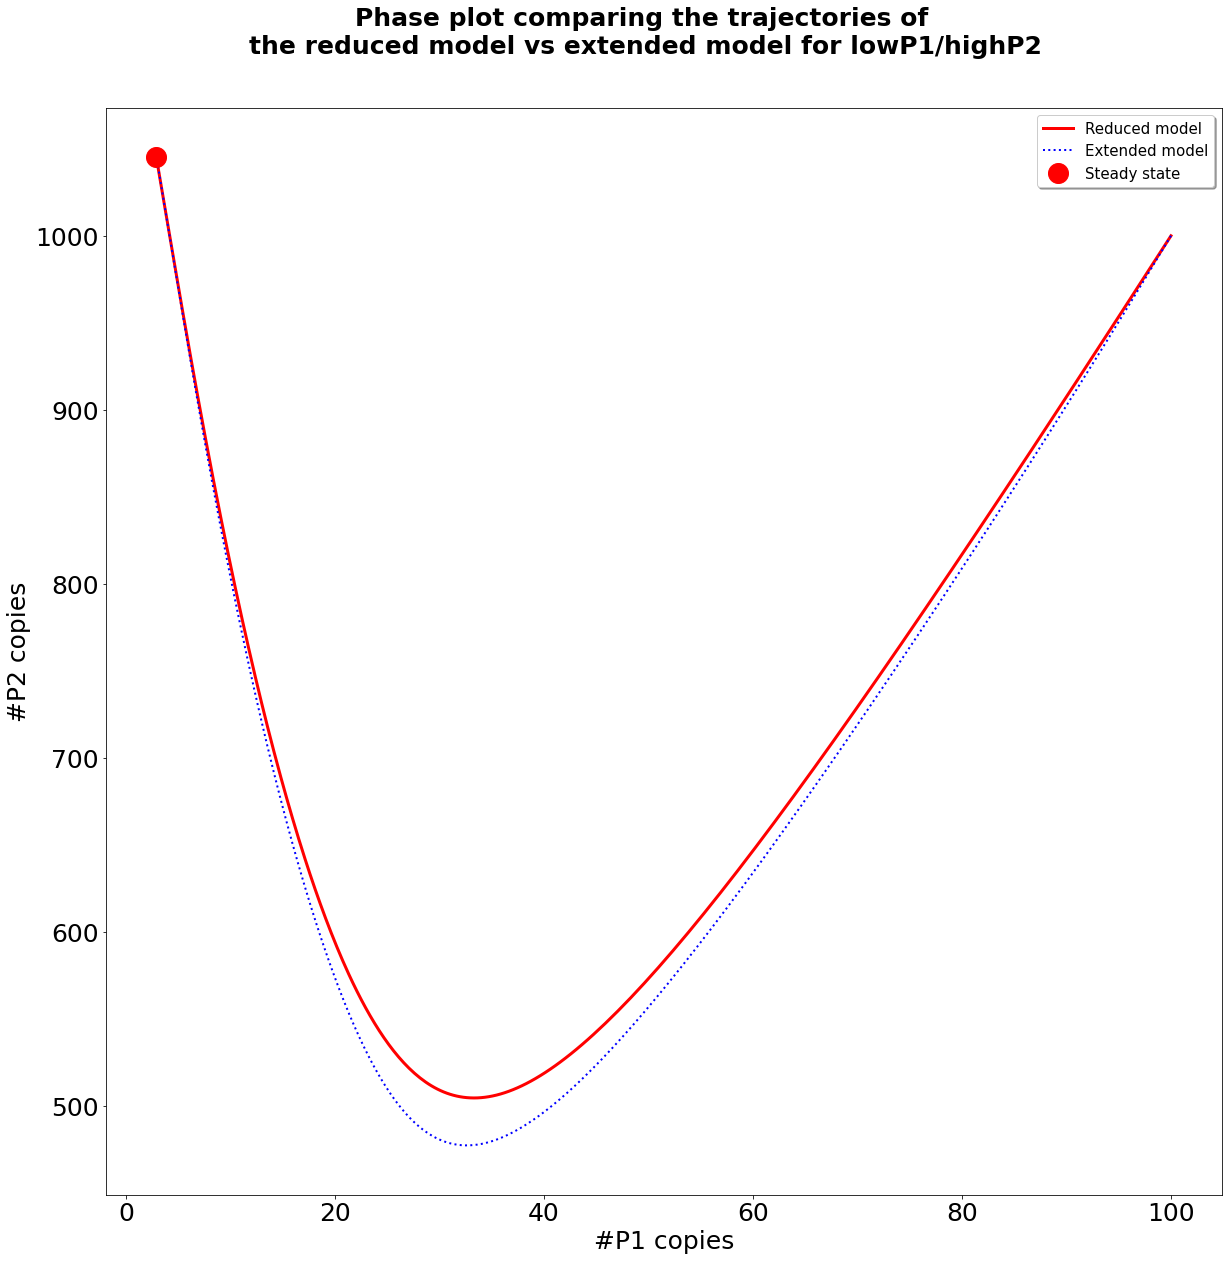

In [16]:
# Figure 9

fig = plt.figure(figsize=(20,20))
fig.suptitle('Phase plot comparing the trajectories of \nthe reduced model vs extended model for lowP1/highP2', fontsize=25, fontweight='bold', y=0.95)
ax1 = fig.add_subplot(1,1,1)

ax1.plot(P1_obs0, P2_obs0,'r-', linewidth=3, label='Reduced model')
ax1.plot(P1_obs2, P2_obs2,'b:', linewidth=2, label='Extended model')
ax1.plot(P1_obs2[-1], P2_obs2[-1],'ro', markersize=20, label='Steady state')

ax1.set_xlabel('#P1 copies')
ax1.set_ylabel('#P2 copies')

ax1.xaxis.label.set_size(25)
ax1.yaxis.label.set_size(25)
ax1.xaxis.set_tick_params(labelsize=25)
ax1.yaxis.set_tick_params(labelsize=25)

ax1.legend(loc = 'upper right', prop={'size': 15}, shadow=True)

plt.savefig('fig9.png');


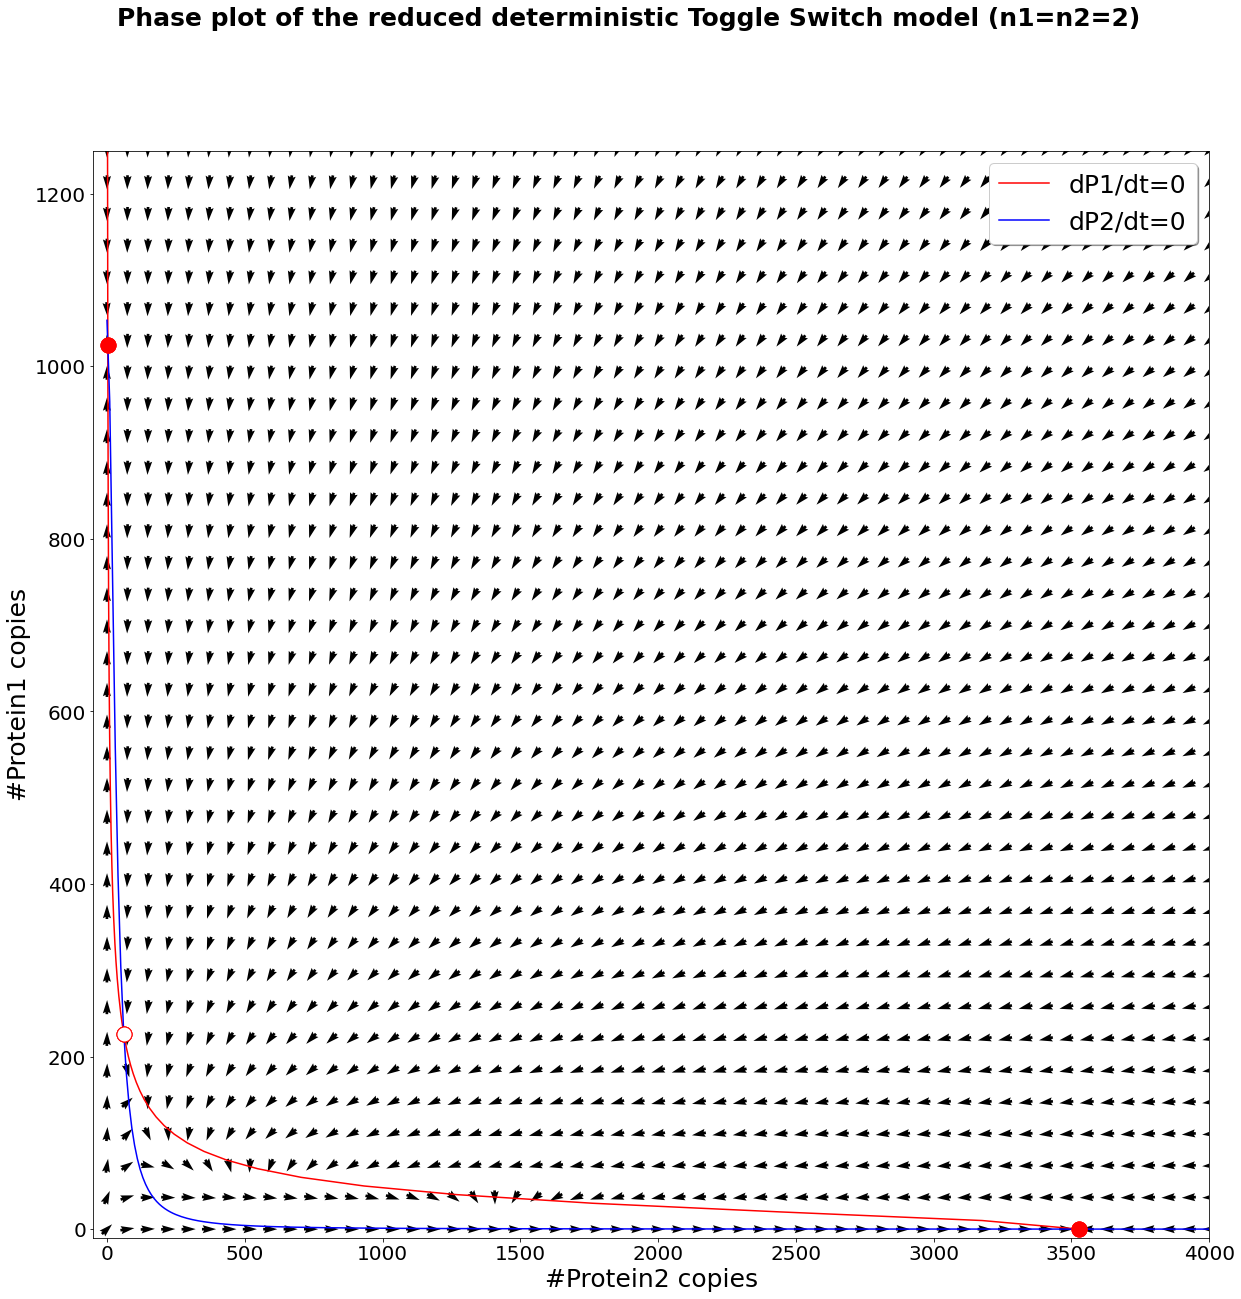

In [17]:
#Figure 10

from helper_functions import *
# imports the direction_field function 

# DEFINE INITIAL CONDITIONS AND PARAMETERS
# values chosen fits with the deterministic model

#kp1= 0.9726
#kp2= 0.170
kp1= 58.24
kp2= 17.38
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
params = [kp1, kp2, kdp1, kdp2, K1, K2, n1, n2]

#time points
t_start = 0
t_end = 10000
n_obs = 4000
t_obs = np.linspace(t_start, t_end, n_obs)

# make figure that the results will be plotted into
fig = plt.figure(figsize=(20,20))
fig.suptitle('Phase plot of the reduced deterministic Toggle Switch model (n1=n2=2) ', 
              fontsize=25, fontweight='bold')
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-50,4000)
ax.set_ylim(-10,1250)

# Draw direction field onto the plot
draw_direction_field(ax,sdot_toggle,params,normalise=True)

# Calculate the conditions for dP1/dt=0 (nullclines of P1)
P2_vals = np.linspace(0,10000,1000)
P1_vals = []
for P2 in P2_vals:
    P1_ss = (kp1/(kdp1)) * ((K2**n2)/(((P2**n2 + K2**n2))))
    P1_vals.append(P1_ss)

    s0 = [P1_ss, P2]

P1_nullcline_P1_vals = P1_vals    # x vals
P1_nullcline_P2_vals = P2_vals   # y vals

# Calculate the conditions for dP2/dt=0 (nullclines of P2)
P1_vals = np.linspace(0,10000,1000)
P2_vals = []
for P1 in P1_vals:
    P2_ss = (kp2/(kdp2)) * ((K1**n1)/(((P1**n1 + K1**n1))))
    P2_vals.append(P2_ss)

    s0 = [P2_ss, P1]

P2_nullcline_P1_vals = P1_vals   # x vals
P2_nullcline_P2_vals = P2_vals    # y vals

# Plot nullclines
ax.plot(P1_nullcline_P1_vals, P1_nullcline_P2_vals, 'r-', label='dP1/dt=0')
ax.plot(P2_nullcline_P1_vals, P2_nullcline_P2_vals, 'b-', label='dP2/dt=0')

# Plot intersections
first_line = LineString(np.column_stack((P1_nullcline_P1_vals, P1_nullcline_P2_vals)))
second_line = LineString(np.column_stack((P2_nullcline_P1_vals, P2_nullcline_P2_vals)))
intersection = first_line.intersection(second_line)

for i in range(len(intersection)):
    ax.plot(*intersection[0].xy, 'ro', markersize = '15')
    ax.plot(*intersection[1].xy, 'ro', markerfacecolor='w', markersize = '15')
    ax.plot(*intersection[2].xy, 'ro', markersize = '15')

# Define plot axes
ax.legend(loc = 1, prop={'size': 25}, shadow=True)
ax.set_xlabel('#Protein2 copies')
ax.set_ylabel('#Protein1 copies')
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.savefig('fig10.png');